<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/AWI_Logo_2017.svg" style="position:absolute; right: 10px; top: 10px; width: 15%;">

# <center> Foucaults Pendulum </center>

# Table of contents
   
1. [Introduction](#introduction) <br>
2. [Imports & settings](#imports)<br>
3. [Implementation](#impl)<br>
    3.1 [Simple Plot](#plt)<br>
    3.2 [Interactive Widget](#wid)<br>


# 1. Introduction <a name="introduction"></a>
The Foucault pendulum, named after its inventor, the French
physicist <a href="https://en.wikipedia.org/wiki/L%C3%A9on_Foucault"
target="_blank">Léon Foucault</a>, is a very long spherical pendulum swith a large mass at the bottom. In an experiment with such sa pendulum in 1851, Foucault was able to prove for the first stime in a simple way that the earth rotates. Before that, sone always had to rely on long observations of the night sky sand calculations. With this experiment, it has been possible sto make the earth's rotation accessible in a relatively ssimple way, even to people with little or no knowledge of sphysics.

Download the notebook from <i><a href="FoucaultsPendulum.ipynb" downlaod>here</a></i>.

### How is this experiment performed?
The pendulum is set up at a fixed point and brought into an initial position, where the release of a band with the help of fire sets the pendulum in swinging motion. This is to prevent unwanted movement and additional swing and spin.

### What can be observed?
At the poles of our earth, after about 23.93 hours, it would look as if the pendulum had turned 360°, but in fact it is the earth that turns under the pendulum and this turn is not transmitted to the swinging object. At the equator this is different, because there the path of the pendulum does not seem to change. This is due to the fact that a day on earth, with its almost 24 hours, divided by the sine of the latitude at the equator is 0. $$0=\frac{23.99}{sin(0)}$$

Other references:
<ul>
    <li>
        <a target="_blank" href="https://www.kip.uni-heidelberg.de/image/f/oeffwiss/pendel/Foucault.pdf"> The Foucault Pendulum </a> - a Simplified Trajectory Analysis for a Pendulum on a Turntable and an Outlook to a Pendulum on Earth, A. Reiser annd J. Stiewe (2018)
    </li>
</ul>

_____

Notebook created by <a href="b-schwertfeger.de">Benjamin Thomas Schwertfeger</a> (December, 2021) <br>
The calculation is based on a <a href="FoucaultsPendulum.txt" target="_blank">R script</a> by Prof. Dr. Gerrit Lohmann, Alfred-Wegener-Institue Bremerhaven (November, 2021)

<a href="mailto:benjamin.schwertfeger@awi.de">benjamin.schwertfeger@awi.de</a><br>
Alfred-Wegener-Institute <br>
Helmholtz Centre for Polar and Marine Research<br>

Bussestraße 24<br>
D-27570 Bremerhaven<br>
Germany<br>

_____

# 2. Imports and Settings <a name="imports"></a>

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# constants for this notebook
mpl.rcParams["figure.figsize"] = 10, 10
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["xtick.labelsize"] = 16
mpl.rcParams["ytick.labelsize"] = 16

# 3. Implementation <a name="impl"></a>

In [5]:
def computeFP(lat, tday, tmax, dt):
    # Initial Conditions
    g = 9.81 # m/s**2, acceleration due to gravity
    L = 67/10 # length of pendulum string
    initial_x = L / 100 # initial x coordinate
    initial_y = 0.1 # initial y
    initial_u = 0 # initial u
    initial_v = 0 # initial v

    # Definitions based on User Variables
    Omega = 2 * np.pi / tday
    phi = lat / 180 * np.pi
    sphi = np.sin(phi)

    def a_x(yd, r):
        return 2 * Omega * sphi * yd - (g / L) * r

    def a_y(xd, r):
        return -2 * Omega * sphi * xd - (g / L) * r
        
    # set up and initialize vectors for x, x_d, x_dd, and y, y_d, y_dd
    x = [initial_x] # x+x_d*t
    y = [initial_y] # y+y_d*t
    x_d = [initial_u] # x_d + x_dd*t
    y_d = [initial_v] # y_d + y_dd*t
    x_dd = [a_x(y_d[0], x[0])] # 2*Omega*phi*y_d-(g/L)*x
    y_dd = [a_y(x_d[0], y[0])] # -2*Omega*phi*x_d-(g/L)*y

    # loop over all timesteps
    for i in range(1,tmax):
        x_dd.append(a_x(y_d[i-1], x[i-1]))
        y_dd.append(a_y(x_d[i-1], y[i-1]))
        x_d.append(x_d[i-1] + x_dd[i] * dt)
        y_d.append(y_d[i-1] + y_dd[i] * dt)
        x.append(x[i-1] + x_d[i] * dt)
        y.append(y[i-1] + y_d[i] * dt)

    return x,y # coordinates

In [6]:
# User defined Variables
lat = 49 # default: 49 | latitude
tday = 86400 # default: 86400 | length of one Day in seconds
tmax = tday * 2 # default: tday * 2 | time of simulation in seconds
dt=1

x,y = computeFP(lat, tday, tmax, dt) 

## 3.1 Simple Plot <a name="plt"></a>

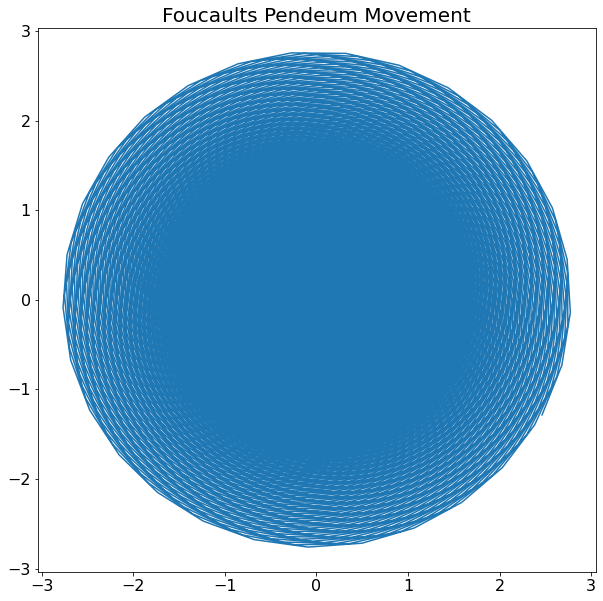

In [7]:
begin, end, step_size = 0, int(tmax/2), 5 # <- change this to see different movements

plt.plot(x[begin:end:step_size],y[begin:end:step_size])
plt.title(f"Foucaults Pendeum Movement")
plt.show()

## 3.2 Interactive Widget <a name="wid"></a> 

- Download this notebook <a href="FoucaultsPendulum.ipynb" downlaod><i>here</i></a> to use the interactive visualization. 

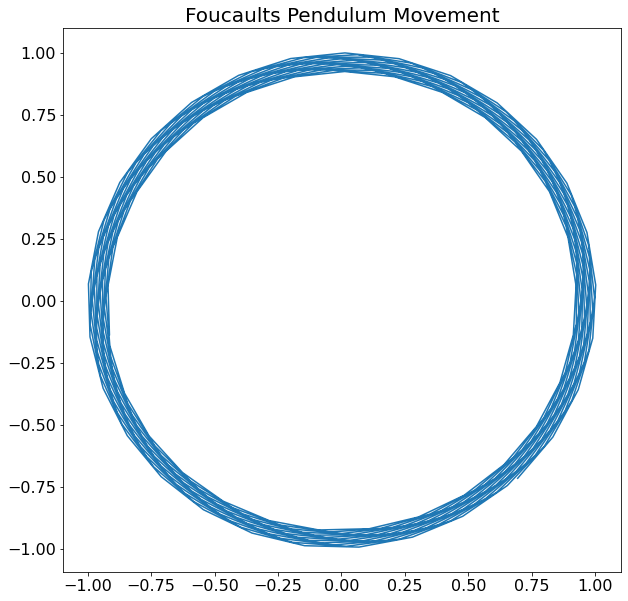

In [14]:
style = {"description_width": "100px"}
layout = {"width": "370px"}

def doit(begin=0, end=tmax, step_size=5):
    plt.plot(x[begin:end:step_size], y[begin:end:step_size]);
    plt.title("Foucaults Pendulum Movement")

begin_slider = widgets.IntSlider(min=0, max=tmax/2, step=1, value=0, style=style, layout=layout) 
end_slider = widgets.IntSlider(min=0, max=tmax/2, step=1, value=tmax, style=style, layout=layout) 
step_slider = widgets.IntSlider(min=1, max=50, step=1, value=5, style=style, layout=layout) 

w = widgets.interactive(doit, begin=begin_slider, end=end_slider, step_size=step_slider)
doit()

In [9]:
widgets.Box(
    [
        widgets.HBox([
            w.children[-1], widgets.VBox([w.children[0],w.children[1],w.children[2]])
        ])
    ]
)

Box(children=(HBox(children=(Output(), VBox(children=(IntSlider(value=0, description='begin', layout=Layout(wi…